MovieWriter imagemagick unavailable; using Pillow instead.


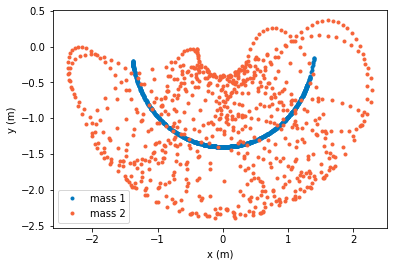

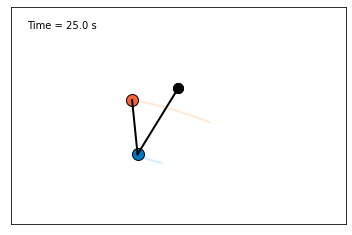

In [1]:
from __future__ import print_function   
from scipy.integrate import odeint 

import time
import math
import numpy as np
import pylab as py


#import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib import pyplot as plt


m1 = 2                 # mass of pendulum 1 (in kg)
m2 = 1                 # mass of pendulum 2 (in kg)
L1 = 1.4                 # length of pendulum 1 (in meter)
L2 = 1                 # length of pendulum 2 (in meter)
g = 9.8                # gravitatioanl acceleration constant (m/s^2)

u0 = [-np.pi/2.2, 0, np.pi/1.8, 0]    # initial conditions. 
# u[0] = angle of the first pendulum
# u[1] = angular velocity of the first pendulum
# u[2] = angle of the second pendulum
# u[3] = angular velocity of the second pendulum

tfinal = 25.0       # Final time. Simulation time = 0 to tfinal.
Nt = 751
t = np.linspace(0, tfinal, Nt)

# Differential equations describing the system
def double_pendulum(u,t,m1,m2,L1,L2,g):
    # du = derivatives
    # u = variables
    # p = parameters
    # t = time variable
    
    du = np.zeros(4)
  
    
    c = np.cos(u[0]-u[2])  # intermediate variables
    s = np.sin(u[0]-u[2])  # intermediate variables

    
    du[0] = u[1]   # d(theta 1)
    du[1] = ( m2*g*np.sin(u[2])*c - m2*s*(L1*c*u[1]**2 + L2*u[3]**2) - (m1+m2)*g*np.sin(u[0]) ) /( L1 *(m1+m2*s**2) )
    du[2] = u[3]   # d(theta 2)   
    du[3] = ((m1+m2)*(L1*u[1]**2*s - g*np.sin(u[2]) + g*np.sin(u[0])*c) + m2*L2*u[3]**2*s*c) / (L2 * (m1 + m2*s**2))
    
    return du
    
sol = odeint(double_pendulum, u0, t, args=(m1,m2,L1,L2,g))

#sol[:,0] = u1 = Θ_1
#sol[:,1] = u2 = ω_1
#sol[:,2] = u3 = Θ_2
#sol[:,3] = u4 = ω_2
u0 = sol[:,0]     # theta_1 
u1 = sol[:,1]     # omega 1
u2 = sol[:,2]     # theta_2 
u3 = sol[:,3]     # omega_2 


# Mapping from polar to Cartesian
x1 = L1*np.sin(u0);          # First Pendulum
y1 = -L1*np.cos(u0);

x2 = x1 + L2*np.sin(u2);     # Second Pendulum
y2 = y1 - L2*np.cos(u2);


py.close('all')

py.figure(1)
#py.plot(t,x1)
#py.plot(t,y1)
py.plot(x1,y1,'.',color = '#0077BE',label = 'mass 1')
py.plot(x2,y2,'.',color = '#f66338',label = 'mass 2' )
py.legend()
py.xlabel('x (m)')
py.ylabel('y (m)')

#py.figure(2)
#py.plot(t,x2)
#py.plot(t,y2)


fig = plt.figure()
ax = plt.axes(xlim=(-L1-L2-0.5, L1+L2+0.5), ylim=(-2.5, 1.5))
#line, = ax.plot([], [], lw=2,,markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")
line1, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line for Earth
line2, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line for Jupiter
line3, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line4, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line5, = ax.plot([], [], 'o', color='k', markersize = 10)
time_template = 'Time = %.1f s'
time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)


ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    time_string.set_text('')

    
    return  line3,line4, line5, line1, line2, time_string

# animation function.  This is called sequentially
def animate(i):
    # Motion trail sizes. Defined in terms of indices. Length will vary with the time step, dt. E.g. 5 indices will span a lower distance if the time step is reduced.
    trail1 = 6              # length of motion trail of weight 1 
    trail2 = 8              # length of motion trail of weight 2
    
    dt = t[2]-t[1]          # time step
    
    line1.set_data(x1[i:max(1,i-trail1):-1], y1[i:max(1,i-trail1):-1])   # marker + line of first weight
    line2.set_data(x2[i:max(1,i-trail2):-1], y2[i:max(1,i-trail2):-1])   # marker + line of the second weight
    
    line3.set_data([x1[i], x2[i]], [y1[i], y2[i]])       # line connecting weight 2 to weight 1
    line4.set_data([x1[i], 0], [y1[i],0])                # line connecting origin to weight 1
    
    line5.set_data([0, 0], [0, 0])
    time_string.set_text(time_template % (i*dt))
    return  line3, line4,line5,line1, line2, time_string


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nt, interval=1000*(t[2]-t[1])*0.8, blit=True)

anim.save('double_pendulum_animation.gif', fps=1.0/(t[2]-t[1]), writer = 'imagemagick')

plt.show()